In [1]:
from sklearn import datasets
import numpy as np

In [2]:
'''
Train a decision tree on the Iris dataset
Keep only two features: Petal Length and Petal Width, for visualization the decision boundary
'''

iris = datasets.load_iris()
X = iris.data[:, [2, 3]] 
y = iris.target

In [3]:
'''
Train-Test Split
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

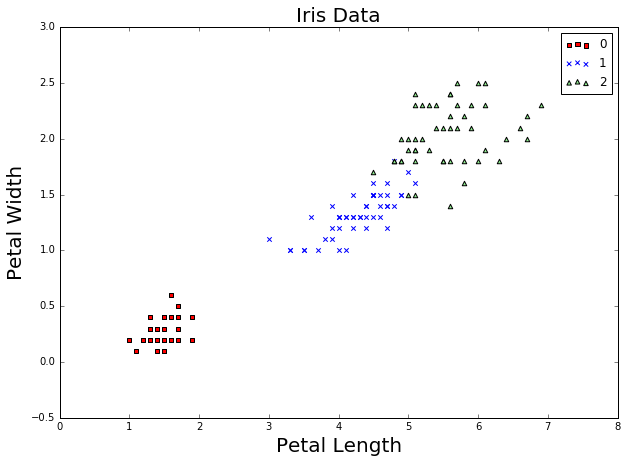

In [4]:
'''
Visualize the data points
'''

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

plt.figure(figsize=(10,7))
colors = ('red', 'blue', 'lightgreen')
markers = ('s', 'x', '^')

# Plot all points
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], c=colors[idx], marker=markers[idx], label=cl)

plt.xlabel("Petal Length", fontsize=20)
plt.ylabel("Petal Width", fontsize=20)
plt.title("Iris Data", fontsize=20)
plt.legend()

In [5]:
np.unique(y)

array([0, 1, 2])

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
'''
Build a decision tree, use entropy as splitting criterion, specify tree max depth
'''

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [8]:
'''
Use the tree on the test set
'''

y_pred = tree.predict(X_test) # Predict the class labels for the test instances
num_misclassified = sum(y_pred!=y_test) # Compare predicted labels with true labels
print("number of misclassified samples = %s" % num_misclassified)

number of misclassified samples = 1


In [14]:
'''
tree.predict_proba returns the class membership probabilities for each class for an instance
'''

for i, instance in enumerate(X_test):
    if tree.predict(instance) != y_test[i]:
        print 'The right class is: ', y_test[i]
        print 'The predicted class is: ', tree.predict(instance)
        print 'The class membership probabilities is: ', tree.predict_proba(instance)

The right class is:  1
The predicted class is:  [2]
The class membership probabilities is:  [[ 0.  0.  1.]]


/Users/lzq857/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/lzq857/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/lzq857/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single s

In [15]:
'''
Plot decision boundary
'''
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

import numpy as np

%matplotlib inline

def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', '^', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

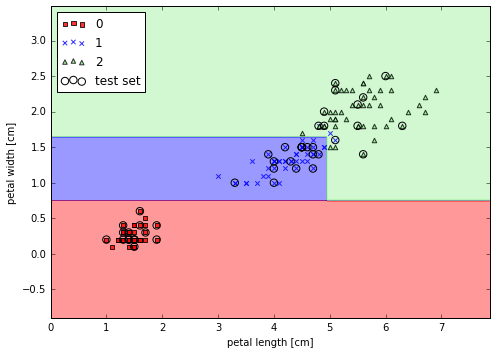

In [16]:
plt.figure(figsize=(7,5))
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,
                      classifier=tree, test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()

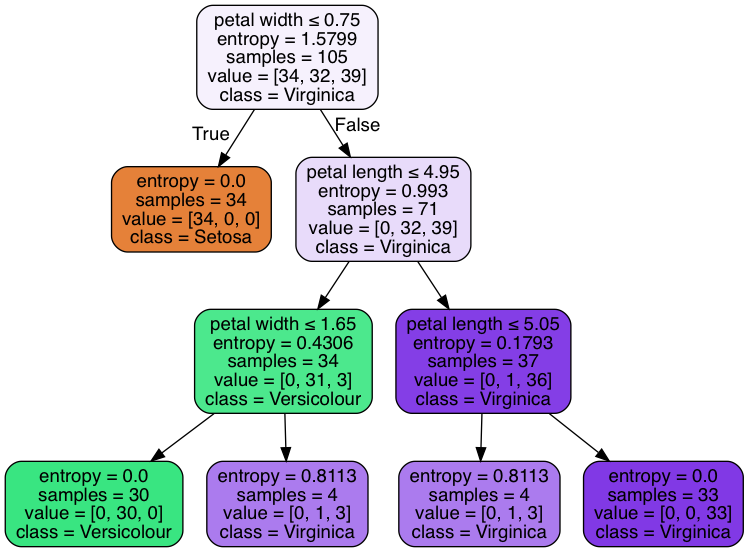

In [18]:
'''
Visualize the Tree
Note: need to brew install graphviz to use dot command
'''
from sklearn.tree import export_graphviz
from IPython.display import Image

# Create a .dot file that shows a graphical representation of the tree
export_graphviz(tree, out_file='tree.dot', feature_names=['petal length', 'petal width'],
                                class_names=["Setosa", "Versicolour", "Virginica"],
                                filled=True, rounded=True,
                                special_characters=True)

# Convert the .dot file to .png
# The ! at the beginning of the command indicates that this is a shell command
!dot -Tpng tree.dot -o tree.png

# Display the .png file
Image("tree.png")